<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

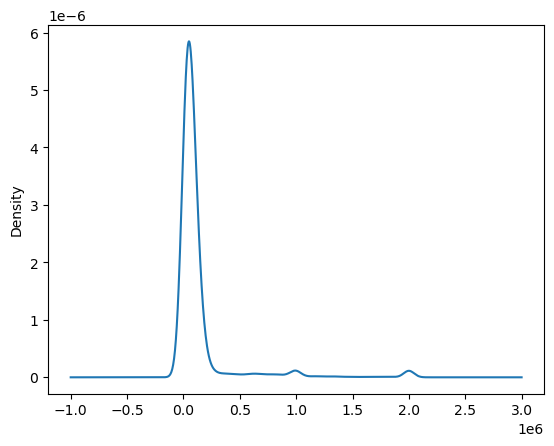

In [5]:
# your code goes here

df['ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


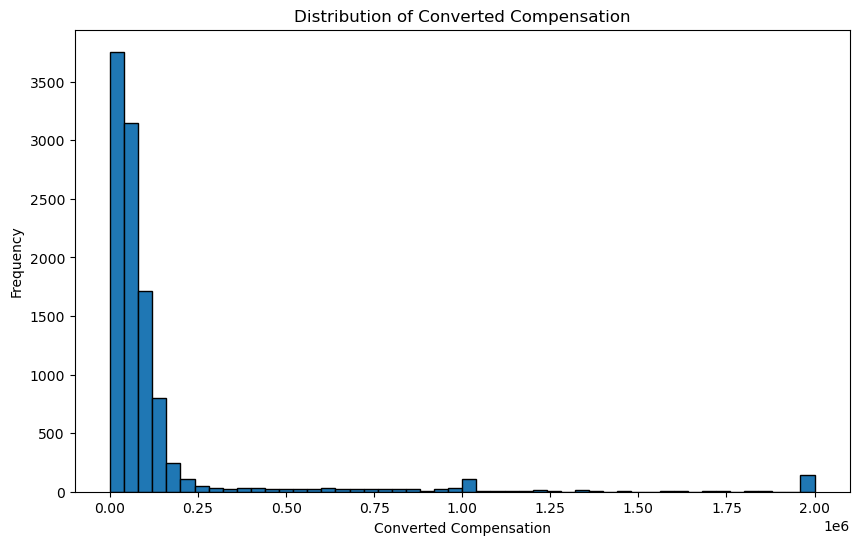

In [6]:
# your code goes here
import matplotlib.pyplot as plt
# Plot the distribution curve for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df['ConvertedComp'], bins=50, edgecolor='k')  # Plot the histogram
plt.xlabel('Converted Compensation')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Distribution of Converted Compensation')  # Set the title
plt.show()  # Display the plot

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
df.median()

Respondent       12484.0
CompTotal        65000.0
ConvertedComp    57745.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

How many responders identified themselves only as a **Man**?


In [23]:
# your code goes here
len(df[df['Gender']== 'Man'])

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes here

df[df['Gender']== 'Woman'].median()

Respondent       11973.0
CompTotal        65000.0
ConvertedComp    57708.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 28.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Age Frequency Distribution')

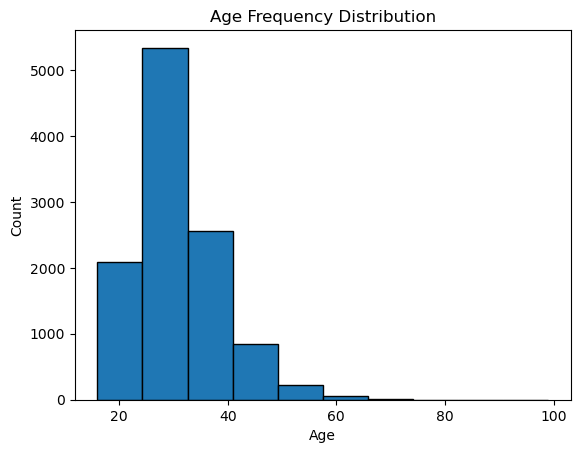

In [32]:
# your code goes here
plt.hist(df['Age'], edgecolor = 'Black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Frequency Distribution')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

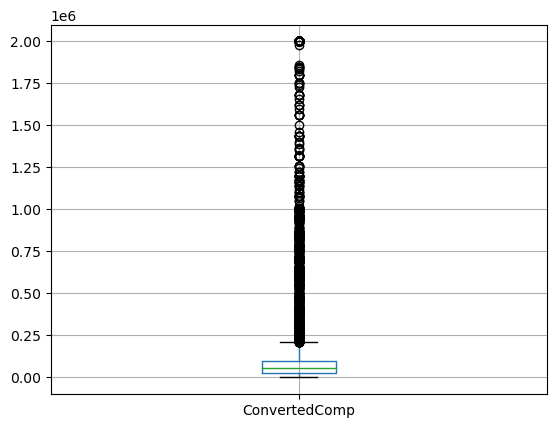

In [66]:
# your code goes here
df.boxplot(column = ['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [76]:
# your code goes here

df['ConvertedComp'].dropna(axis=0,inplace=True) 
print(df.median())
Q1,Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
Int_Q_R=Q3 - Q1
#print(Int_Q_R)


Respondent       12484.0
CompTotal        65000.0
ConvertedComp    57745.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64


Find out the upper and lower bounds.


In [38]:
# your code goes here

U=Q3+(Int_Q_R*1.5)
L=Q1-(Int_Q_R*1.5)

print(U)
print(L)


209698.0
-82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [53]:
# your code goes here
len(df['ConvertedComp']<L) | (df['ConvertedComp']>U)


0        True
1        True
2        True
3        True
4        True
         ... 
11393    True
11394    True
11395    True
11396    True
11397    True
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [79]:
# your code goes here
new_df = df[(df['ConvertedComp'] >= L) & (df['ConvertedComp'] <= U)]
new_df.mean()
#new_df.median()

Respondent        12501.007317
CompTotal        724113.931155
ConvertedComp     59883.208389
WorkWeekHrs          41.864782
CodeRevHrs            4.737455
Age                  30.695860
dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [62]:
# your code goes here

df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
